<h1>Вычислительная математика. Лабораторная работа №2</h1>
<h2>Интерполирование кубическим сплайном дефекта 1</h2>
<p>Задаем число N и отрезок [a;b]</p>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x_):
    return (N + 1) / (N + 2) * np.cos(2 * N / (3 + N) * x_)


# определяем функцию для вычисления значения кубического сплайна
def S(x_):
    i = 0
    while i < Lenght - 1 and x_ > x[i + 1]:
        i += 1
    if i == Lenght - 1:
        i -= 1
    t = x_ - x[i]
    return y[i] + b[i] * t + c[i] * t ** 2 + d[i] * t ** 3


a = 0
b = 5
n = 10
h_ = (b-a)/n
x = [a + i * h_ for i in range(n)]
N = 6
y = [f(xi) for xi in x]

d = {'x': x, 'f(x)':y}
df = pd.DataFrame(data=d)
df.to_string(index=False)
print(df)
#x = [4.302, 4.381, 4.626, 4.886, 4.808, 4.872, 4.382, 4.181, 4.483, 4.418]
#y = [5.861, 6.212, 2.868, 2.647, 6.198, 3.499, 3.529, 6.511, 5.955, 4.185]


       x   f(x)
0  4.302  5.861
1  4.381  6.212
2  4.626  2.868
3  4.886  2.647
4  4.808  6.198
5  4.872  3.499
6  4.382  3.529
7  4.181  6.511
8  4.483  5.955
9  4.418  4.185


<p>Используем метод мартичной прогонки</p>

In [22]:
Lenght = len(x)

# Сортируем значения x и y
sorted_indices = np.argsort(x)
x = [x[i] for i in sorted_indices]
y = [y[i] for i in sorted_indices]
N = 6

h = np.zeros(Lenght - 1)
alpha = np.zeros(Lenght - 1)
FirstInterpolCoefficient = np.zeros(Lenght)
SecondInterpolCoefficient = np.zeros(Lenght)
ThirdInterpolCoefficient = np.zeros(Lenght)
c = np.zeros(Lenght)
b = np.zeros(Lenght - 1)
d = np.zeros(Lenght - 1)

for i in range(Lenght - 1):
    h[i] = x[i + 1] - x[i]

for i in range(1, Lenght - 1):
    alpha[i] = (3 / h[i]) * (y[i + 1] - y[i]) - (3 / h[i - 1]) * (y[i] - y[i - 1])

# Метод прогонки
FirstInterpolCoefficient[0] = 1
SecondInterpolCoefficient[0] = 0
ThirdInterpolCoefficient[0] = 0

for i in range(1, Lenght - 1):
    FirstInterpolCoefficient[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * SecondInterpolCoefficient[i - 1]
    SecondInterpolCoefficient[i] = h[i] / FirstInterpolCoefficient[i]
    ThirdInterpolCoefficient[i] = (alpha[i] - h[i - 1] * ThirdInterpolCoefficient[i - 1]) / FirstInterpolCoefficient[i]

FirstInterpolCoefficient[Lenght - 1] = 1
ThirdInterpolCoefficient[Lenght - 1] = 0
c[Lenght - 1] = 0

# обратный ход
for j in range(Lenght - 2, -1, -1):
    c[j] = ThirdInterpolCoefficient[j] - SecondInterpolCoefficient[j] * c[j + 1]
    b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
    d[j] = (c[j + 1] - c[j]) / (3 * h[j])

Выводим полученную матрицу

In [23]:
print("Матрица:")

# создаем диагональную матрицу
diag = np.diag(np.round(FirstInterpolCoefficient, 3))

# создаем матрицы с смещением от главной диагонали
updiag = np.diagflat(np.round(ThirdInterpolCoefficient[:-1], 3), 1)
downdiag = np.diagflat(np.round(SecondInterpolCoefficient[1:], 3), -1)

# складываем все три матрицы
matrix = diag + updiag + downdiag

# создаем dataframe
df = pd.DataFrame(matrix)

# задаем имена столбцов и индексы строк
df.columns = [f'col{i + 1}' for i in range(df.shape[1])]
df.index = [f'row{i + 1}' for i in range(df.shape[0])]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# выводим dataframe
print(df)

Матрица:
        col1   col2    col3       col4        col5       col6      col7     col8     col9    col10
row1   1.000  0.000   0.000      0.000       0.000      0.000     0.000    0.000    0.000    0.000
row2   0.198  0.400  73.612      0.000       0.000      0.000     0.000    0.000    0.000    0.000
row3   0.000  0.007   0.144 -55874.544       0.000      0.000     0.000    0.000    0.000    0.000
row4   0.000  0.000   0.487      0.074  110274.390      0.000     0.000    0.000    0.000    0.000
row5   0.000  0.000   0.000      0.352       0.184 -21372.229     0.000    0.000    0.000    0.000
row6   0.000  0.000   0.000      0.000       0.364      0.393  3161.398    0.000    0.000    0.000
row7   0.000  0.000   0.000      0.000       0.000      0.304     0.598 -555.918    0.000    0.000
row8   0.000  0.000   0.000      0.000       0.000      0.000     0.147    0.437 -183.755    0.000
row9   0.000  0.000   0.000      0.000       0.000      0.000     0.000    0.095    0.147 -302.114
r

<p>Выводим коэффициенты кубического сплайна</p>

In [24]:
print("Коэффициенты кубического сплайна:")
for i in range(Lenght - 1):
    print(
        f"S{i + 1}(x) = {round(y[i], 3)} + {round(b[i], 3)}(x - {round(x[i], 3)}) + {round(c[i], 3)} (x - {round(x[i], 3)})^2 + {round(d[i], 3)} (x - {round(x[i], 3)})^3 = {S(x[i])}")


Коэффициенты кубического сплайна:
S1(x) = 6.511 + -460.117(x - 4.181) + 0.0 (x - 4.181)^2 + 31059.696 (x - 4.181)^3 = 6.511
S2(x) = 5.861 + 904.118(x - 4.302) + 11274.67 (x - 4.302)^2 + -286872.938 (x - 4.302)^3 = 5.861000000000004
S3(x) = 6.212 + -2685.606(x - 4.381) + -56714.217 (x - 4.381)^2 + 59320276.724 (x - 4.381)^3 = 6.211999999999989
S4(x) = 3.529 + -2621.074(x - 4.382) + 121246.614 (x - 4.382)^2 + -1331467.752 (x - 4.382)^3 = 3.5289999999999995
S5(x) = 4.185 + 931.936(x - 4.418) + -22551.904 (x - 4.418)^2 + 132820.97 (x - 4.418)^3 = 4.185000000000009
S6(x) = 5.955 + -316.306(x - 4.483) + 3348.186 (x - 4.483)^2 + -9001.525 (x - 4.483)^3 = 5.954999999999991
S7(x) = 2.868 + 89.059(x - 4.626) + -513.469 (x - 4.626)^2 + 684.98 (x - 4.626)^3 = 2.868000000000009
S8(x) = 6.198 + -29.776(x - 4.808) + -139.47 (x - 4.808)^2 + -847.104 (x - 4.808)^3 = 6.198000000000003
S9(x) = 3.499 + -58.037(x - 4.872) + -302.114 (x - 4.872)^2 + 7193.183 (x - 4.872)^3 = 3.499


<p>Строим график</p>

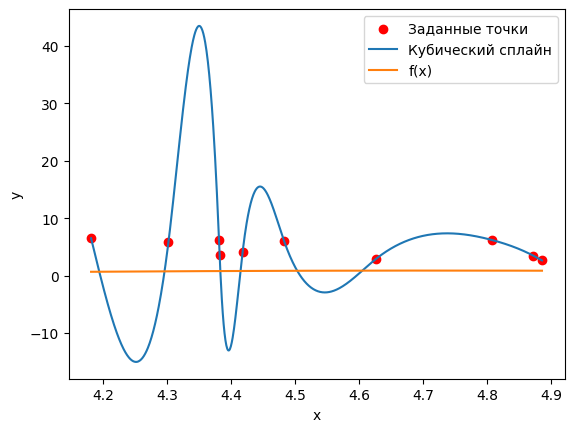

In [25]:
# задаем интервал для построения графика
xmin, xmax = min(x), max(x)
step = (xmax - xmin) / 1000
x_vals = np.arange(xmin, xmax + step, step)

# строим график точек и кубического сплайна
plt.scatter(x, y, color='red', label='Заданные точки')
plt.plot(x_vals, [S(x) for x in x_vals], label='Кубический сплайн')
x1 = np.linspace(min(x), max(x), 1000)
y1 = [f(xi) for xi in x1]
plt.plot(x1, y1, label='f(x)')
# добавляем легенду и подписи осей
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# выводим график
plt.show()

<p>Отсюда можно сделать вывод, что погрешность в узлах интерполяции равна 0</p>

<p>В лабораторной работе №2 был рассмотрен и применен метод интерполяции кубическим сплайном и написана программа для данного метода на языке Python. Получен график и сделан вывод.</p>